# Solving ODEs
## Differential Equations

- Differential equations involve derivatives of functions
    - Ordinary differential equations (ODEs) involve only derivates of one variable
    - Partial differential equations (PDEs) involve partial derivatives

- General form of ODE:

$$  \frac{d^nf(x)}{dx^n} = F\left(  x, f(x), f'(x), f''(x), \cdots , f^{n-1}(x)   \right)  $$

- $F$ is some arbitrary function in terms $x$, $f(x)$, and its derivatives
- $n$ is referred to as the order of the equation

- Classifications of ODEs based on:
    - Order - refers to highest derivative in equation
    - Linearity
        - Linear ODEs - derivatives are only raised to first power (aka linear system of derivatives)
        - Non-linear ODEs
    - Homogeneity
        - Homogenous - each term involves $f(x)$ or its derivatives
            - $f(x) = 0$ is a trivial solution
        - Inhomogeneous - includes a non-zero term that does not include $f(x)$ or its derivatatives
            - No trivial solution

- Examples
    - Linear, second order homogeneous ODE: $f'' + xf' - x^2f = 0$
    - Linear, first order inhomogeneous ODE: $f' + f = x$
    - Nonlinear, third order inhomogenous ODE: $ f''' + xf^2  =  cos(x)$

## Ordinary Differential Equations

- Any ODE has a general solution and a particular solution
    - General solution is any $f_g(x)$ that satisfies the ODE
    - Particular solution is a specific $f_p(x)$ that satisfies the ODE and $n$ explicitly known values of the solution or its derivatives at some points
    - Typically, we are interested in the particular solution

- Example: $ \frac{d^2 f}{dx^2}=0$ 

- The general solution is $f_g(x)=a_1 x + a_0$
    - $a_0$ and $a_1$ are arbitrary constants

- To get the particular solution, the function and its derivative at one or two points needs to be specified

- Initial value problems (IVPs)
    - The value of the function and its derivatives is specified at a point – referred to as the _initial conditions_
    - E.g., motion of a projectile: the initial position and velocity are required to solve the motion of the body w.r.t. time $t$

- Boundary value problems (BVPs)
    - The value of the function or its derivative is specified at the boundaries of the problem domain known as the _boundary conditions_
    - E.g., heat transfer across a rod – one of temperature or heat flux needs to be specified at each end of the rod

## Initial Value Problems

- General form of 1st order IVP: $\frac{du}{dt} = g(u,t)$
    - Given some initial condition: $u(t=t_0) = u_0$

- Solution procedure:

1. Discretize the problem domain into n intervales of time (not necessarily evenly spaced)

<img src="figures/timesteps.png" width=50% class="center">

2. Use a finite difference approximation for the 1st order derivative to convert the differential equation into a difference equation at each time step

3. Solve the resulting difference equation at each point in the discretized problem domain

4. This results in a linear system of equations with the unknowns: $u_1, u_2, \cdots, u_n$
    - The linear system may be coupled depending on the choice of finite difference approximation, in which case a linear solver should be used to solve it

- Discretization methods for initial value problems (IVPs)
    - Euler methods
    - Runge-Kutta methods
        - Methods more sophisticated than the Euler methods
        - Use multiple points to approximate the derivative (e.g., RK4 method uses 4 points)
        - `scipy.integrate.solve_ivp` uses RK4(5) method to solve IVPs
        - Euler methods can be considered as special cases of the RK methods
    - Predictor-corrector methods – add a correction step to a prediction step
        - Prediction step is realized via Euler methods or a similar method

- Explicit methods typically lead to decoupled equations
    - Easy to implement 
    - Typically, less or conditionally stable
        - Stability refers to the ability of the algorithm to keep the error bounded

- Implicit methods lead to coupled linear system of equations
    - Computationally expensive 
    - Can be unconditionally stable

## Forward Euler Method

- Uses the forward difference to approximatge the 1st order derivative

$$ \frac{du}{dt} = g(u,t) $$

$$ \implies \frac{u(t+\Delta t) - u(t)}{\Delta t} \approx g(u,t) $$

$$ \implies u(t + \Delta t) \approx u(t) + \Delta t g(u,t)  $$ 

- Let the discretized problem domain be: ${t_0, t_1, t_2, \cdots, t_n}$ and the initial condition be $u(t_0 ) = u_0$

$$  u_1 \approx u_0 + (t_1 - t_0)g(u_0,t_0)  $$
$$  u_2 \approx u_1 + (t_2 - t_1)g(u_1,t_1)  $$
- In general:

$$  u_{i+1} \approx u_{i} + (t_{i+1} - t_{i})g(u_i,t_i)  $$

- The value of the function at time $t_{i+1}$ can be explicitly computed in terms of known quantities – thus the name _explicit Euler method_

### Example

- A ball is thrown upwards with an initial velocity of 10 m/s. How much time does it take for the ball to reach its maximum height.
- This system can be modeled by the equation $a(t) = \dot{v}(t) = -g$ with initial condition $v(0) = 10 m/s$

- Numerical solution using forward Euler method

$$ \dot{v}(t_i) \approx \frac{v(t_{i+1}) - v(t_i)}{\Delta t} = -g $$

$$ \implies v(t_{i+1}) = -g \Delta t + v(t_i) $$

- Repeated application of this formula will starting with $t_i = 0$ will give us the velocities at other times $t_1, t_2, t_3, \cdots$

In [154]:

%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt

# Problem parameters
v0 = 10  # m/s
g = 9.81 # m/s2

# exact solution
t_exact = v0/g

print(t_exact)


1.019367991845056


In [155]:

# numerical solution
dt = 0.1                # Time step
t = np.arange(0, 2, dt)  # Time domain
v = np.zeros_like(t)     # Initialize velocity array
v[0] = v0                # Set initial velocity


In [168]:

# Compute velocity at discrete time points
for i in range(len(v)-1):
    # Forward Euler formula
    v[i+1] = v[i] - g*dt

# Time of ascent
# Approximated as the time at which the velocity changes sign
t_asc = t[np.argmax(v0-np.abs(v))] + 0.5*dt
print(t_asc)


1.05


In [ ]:

fig, ax = plt.subplots()
ax.plot(t, v, '.k', label='Fwd Euler')
ax.plot(t, np.zeros_like(t), '--m')
ax.set(xlabel='t (s)', ylabel='v (m/s)')


## Backward Euler Method

- Uses the backward difference to approximatge the 1st order derivative

$$ \frac{du}{dt} = g(u,t) $$

$$ \implies \frac{u(t) - u(t - \Delta t)}{\Delta t} \approx g(u,t) $$

$$ \implies u(t) \approx u(t - \Delta t) + \Delta t g(u,t)  $$ 

- Let the discretized problem domain be: ${t_0, t_1, t_2, \cdots, t_n}$ and the initial condition be $u(t_0 ) = u_0$

$$  u_1 \approx u_0 + (t_1 - t_0)g(u_1,t_1)  $$
$$  u_2 \approx u_1 + (t_2 - t_1)g(u_2,t_2)  $$
- In general:

$$  u_{i+1} \approx u_{i} + (t_{i+1} - t_{i})g(u_{i+1},t_{i+1})  $$

- The value of the function at time $t_{i+1}$ is only known _implicitly_ – thus the name _implicit Euler method_

### Example

- Let us consider the exponential decay problem ($a > 0$ and $t\in(0, T]$)

$$ \frac{du(t)}{dt} = -au(t) \qquad \qquad u(t=0) = u_0$$

- Numerical solution using backward Euler method (assuming uniform dicretization)

$$ \frac{du(t_i)}{dt} \approx \frac{u(t_{i}) - u(t_{i-1})}{\Delta t} = -au(t_i) $$

$$ \implies u_i = -a u_i \Delta t + u_{i-1} $$

- Shifting the subscript indices by 1 will not affect the above equation:

$$ u_{i+1} = \frac{u_i}{1 + a \Delta t} $$

- Again, repeated application of this formula will help solve for $u$ at discrete time points
- Such explicit formulae are generally not possible with the backward Euler method
- Nonlinear ODE's result in nonlinear system of algebraic equations
    - Can be solved using the _Newton's method_

In [131]:

# Problem parameters
a = 1
u0 = 1
T = 5     # Final time


In [148]:

# numerical solution
dt = 0.5                 # Time step
t = np.arange(0, T + dt, dt)  # Time domain
u = np.zeros_like(t)     # Initialize u array
u[0] = u0                # Set initial value


In [152]:

# Compute velocity at discrete time points
for i in range(len(u)-1):
    # Backward Euler formula
    u[i+1] = u[i]/(1 + a*dt)

# Exact solution
t_fine = np.linspace(0, T, endpoint=True)
u_exact = np.exp(-a*t_fine)
    

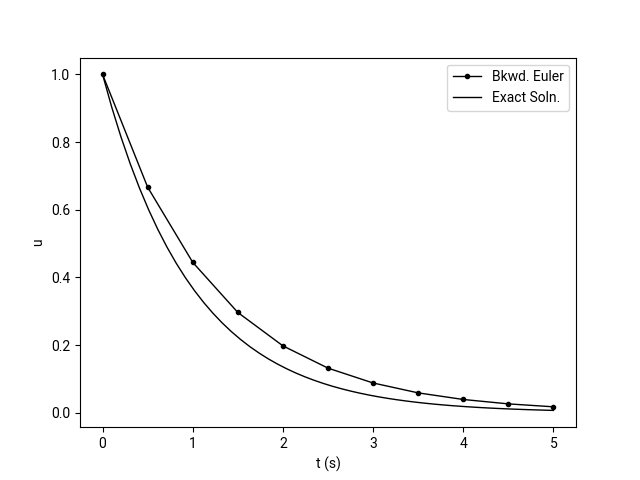

In [153]:

fig, ax = plt.subplots()
ax.plot(t, u, '.-k', label='Bkwd. Euler')
ax.plot(t_fine, u_exact, '-k', label='Exact Soln.')
ax.set(xlabel='t (s)', ylabel='u')
ax.legend();


## Reduction of Order

- IVPs of order $n$ can be reduced to a system of IVPs of order 1


$$ \frac{d^nf}{dt} = F(t, f, f', f'', \cdots, f^{n-1}) $$

- Define a vector S(t) referred to as the state of the system:


$$ \begin{gather}
 S(t) =
  \begin{pmatrix}
   S_1(t) \\ S_2(t) \\ S_3(t) \\ ... \\ S_n(t)
   \end{pmatrix}
   = 
  \begin{pmatrix}
   f(t) \\ f'(t) \\ f''(t) \\ ... \\ f^{n-1}(t)
   \end{pmatrix}
\end{gather}
$$

- Taking the derivative of the matrix equation w.r.t. $t$:


$$ \begin{gather}
 \frac{dS}{dt} =  
  \begin{pmatrix}
   f'(t) \\ f''(t) \\ f'''(t) \\ ... \\ f^{n}(t)
   \end{pmatrix}
   =
  \begin{pmatrix}
   S_2(t) \\ S_3(t) \\ S_4(t) \\ ... \\ F(t, f, f', f'', ..., f^{n-1})
   \end{pmatrix}   
\end{gather}
$$

- Thus, an IVP of order $n$ is now split into $n$ 1<sup>st</sup> order coupled IVPs

$$ \frac{dS_1}{dt} = S_2(t) $$


$$ \frac{dS_2}{dt} = S_3(t) $$


$$ \vdots $$


$$ \frac{dS_n}{dt} = F(t, f, f', f'', ..., f^{n-1}) $$

## Second Order Example

$$ \frac{d^2y}{dt^2} = -g $$

- Exact solution: $y(t) = y_0 + v_0t - \frac{1}{2}gt^2$

- We can turn this into a system of first order equations ($v = dy/dt$): 

$$ \begin{gather}
 S(t) = 
  \begin{pmatrix}
  S_1(t) \\ S_2(t)
  \end{pmatrix}
  =
  \begin{pmatrix}
   y \\ v
   \end{pmatrix}
\end{gather}
$$

$$ \begin{gather}
 \frac{dS}{dt} = 
  \begin{pmatrix}
   \frac{dy}{dt} \\ \frac{dv}{dt}
   \end{pmatrix}
  =
    \begin{pmatrix}
   v \\ -g
   \end{pmatrix}
\end{gather}
$$

- These equations can be written in matrix form as:

$$
\frac{dS}{dt} = 
    \begin{pmatrix}
        0 & 1 \\
        0 & 0
    \end{pmatrix}
    \begin{pmatrix}
        \frac{dy}{dt} \\ \frac{dv}{dt}
    \end{pmatrix}
    +
    \begin{pmatrix}
        0 \\ -g
    \end{pmatrix}
  = A(t)S(t) + b(t)
$$

- Separating the equations:

$$\frac{dy}{dt} = v \qquad  \frac{dv}{dt} = -g$$

- Applying forward difference method:


$$\frac{dy}{dt}\approx\frac{y_{i+1}-y_i}{\Delta t} = v$$


$$\frac{dv}{dt}\approx\frac{v_{i+1}-v_i}{\Delta t} = -g$$

- Solving for values at $t_{i+1}$:

$$ y_{i+1} = y_i + \Delta t v_i $$
$$ v_{i+1} = v_i - \Delta t g $$

- Find the maximum height of a vertically thrown ball
    - $m= 0.1 kg$,  $g = 9.81 m/s^2$,  $v_0 = 10 m/s$,  $y_0 = 0m$

In [ ]:

# Problem parameters
m = 0.1  # kg
v0 = 10  # m/s
y0 = 0   # m
g = 9.81 # m/s2


In [ ]:

# Numpy arrays for t, y and v
dt = 0.01  # Time step
t = np.arange(0, 1.5, dt)  # Time domain
y = np.zeros_like(t)       # Initialize position array
v = np.zeros_like(t)       # Initialize velocity array


In [ ]:

# Set initial height and velocity
y[0] = y0
v[0] = v0

# Numerical solution using foward differencing
for i in range(len(v)-1):
    y[i+1] = y[i] + v[i]*dt
    v[i+1] = v[i] - g*dt

y_max = max(y)    
t_max = t[np.argmax(y)]
print(f"The maximum height reached is {y_max:0.2f} m at a time of {t_max:0.2f} s.")


In [ ]:

# Plot
fig, ax = plt.subplots()
ax.plot(t, y, '-k', label='Height (m)')
ax.plot(t, v, '-r', label='Velocity (m/s)')
ax.plot(t_max, y_max, 'ob')
ax.set(xlabel=r'$t\ (m)$')
ax.legend();


## Python Implementations

- Scipy uses the `solve_ivp` function to evaluate IVPs using a Runge-Kutta RK45 scheme
- Process
    - Step 1: Define system with differential equation and initial condition(s)
    - Step 2: Isolate the highest derivative on the left hand side 
    - Step 3: Create state variable, S. For second and higher order ODEs, rewrite the initial ODE in terms of the state variables. 
    - Step 4: Define a python function whose output is dS/dt
    - Step 5: Use `scipy.integrate.solve_ivp` function

## SciPy IVP Examples

Example 1: First Order, Linear IVP. 

$$ \frac{df}{dt} = f + 1 $$


$$ f(t=0) = 5 $$

In [ ]:

from scipy.integrate import solve_ivp

# Define state variable from f' = f+1
# function should return right hand side of ODE
def f_prime(t,f):
    return f + 1
 
# Initial Condition
f0 = [5]

# Define start, stop, and step for time 
t_span = [0, 5]
t_step = 0.1
t = np.arange(t_span[0], t_span[1]+t_step, t_step)

# exact solution
f_exact = (f0[0]+1)*np.exp(t) - 1

# Evaluate IVP using solve_ivp
# Arguments are the state function, the time span, initial condition(s), and time domain to solve over
# t_eval is an optional argument. scipy will choose some time step if this is not specified
sol = solve_ivp(f_prime, t_span, f0, t_eval = t)
sol


In [ ]:

# use sol.t and sol.y[0] to extract time and function value solutions
fig, ax = plt.subplots()
ax.plot(sol.t, sol.y[0], '-r', label = 'approx')
ax.plot(t, f_exact, '-k', label = 'exact')
ax.legend();


Example 2: First Order, non-linear IVP. 

$$ \frac{df}{dt} = f^2cos(f) $$
$$ f(t=0) = 1 $$

In [ ]:
# Note there does not exist an analytical solution to this equation. It can only be solved numerically. 

# Define state variable from f' = f**2cos(f)
# function should return right hand side of ODE
def f_prime(t,f):
    return f**2*np.cos(f)

# Initial Condition
f0 = 1
t_span = [0,2]

# Evaluate IVP
# Arguments are the state function, the time range, initial condition(s)
sol = solve_ivp(f_prime,t_span,[f0])


In [ ]:

# use sol.t and sol.y[0] to extract time and function value solutions
fig, ax = plt.subplots()
ax.plot(sol.t, sol.y[0], '-ok');


Example 3: Second-order, linear IVP 

$$ \frac{d^2x}{dt^2} = \frac{dx}{dt} + 2x $$


$$ x(t=0) = 1 \qquad \frac{dx}{dt} = 0 $$

- For a second-order ODE, we need to define the state variable, S
- $S_0$ is the base function (x in this case), and $S_1$ is the derivative of $S_0$, which we will call $v$ here

- Then we need to define $\frac{dS}{dt}$
- Rewriting our initial differential equation in terms of $v$ and $x$ gives:

$$ \frac{dv}{dt} = v + 2x \qquad  \frac{dx}{dt} = v$$

- And we can define the state variable and derivative as:

$$
\begin{gather*}
 S =
  \begin{pmatrix}
   x \\ v
   \end{pmatrix}
\qquad \qquad
 \frac{dS}{dt} =
  \begin{pmatrix}
   \frac{dx}{dt} \\ \frac{dv}{dt}
   \end{pmatrix}
   =
   \begin{pmatrix}
   v \\ v + 2x
   \end{pmatrix}  
\end{gather*}
$$

In [ ]:

# The analytical solution to this equation is x(t) = 1/3 e^(-t)[e^(3t)+2]
t_exact = np.linspace(0,1,101)
x_exact = 1/3 * np.exp(-t_exact)*(np.exp(3*t_exact)+2)

# solve_ivp always uses y as the symbol for state variable, instead of S
# you can change all of the y's to s's if it helps
# This function needs to define the two state variables (x,v = y) and return dS/dt as an array
def fun(t, y):
    x, v = y
    dydt = [v, v + 2*x]
    return dydt 

tspan = [0, 1]
y0 = [1, 0]  # initial conditions need to be in order of y = [x0, v0]

# solve the IVP. Note that sol.y returns the entire state variable. To extract just x, use sol.y[0]. To extract just v, use sol.y[1]
sol = solve_ivp(fun, tspan, y0)


In [ ]:

# the default time step chosen by scipy here seems to be a bit coarse. You may wish to specify a smaller dt (see example 1)
fig, ax = plt.subplots()
ax.plot(sol.t, sol.y[0], '-or', label = 'x')
ax.plot(sol.t, sol.y[1], '-ob', label = 'v')
ax.plot(t_exact, x_exact, '-k', label = 'x_exact')
ax.legend();


Example 4: System of IVPs

$$  \frac{dx_1}{dt} = x_2 \qquad \qquad  \frac{dx_2}{dt} = -x_1 - x_2  $$


$$ x_1(0) = 1 \qquad \qquad x_2(0) = 2 $$

- A state variable can be defined. In the case of a system of ODEs, each base variable would be one of the state variables. 

$$
\begin{gather*}
 S =
  \begin{pmatrix}
   x_1 \\ x_2
   \end{pmatrix}
\qquad \qquad
 \frac{dS}{dt} =
  \begin{pmatrix}
   \frac{dx_1}{dt} \\ \frac{dx_2}{dt}
   \end{pmatrix}
   =
   \begin{pmatrix}
   x_2 \\ -x_1 - x_2
   \end{pmatrix}  
\end{gather*}
$$

In [ ]:
# there is probably some analytical solution to this in the form of sin and cos, but I don't feel like solving it

# define the state function using the definitions above
def fun(t, y):
    x1, x2 = y
    dx1dt = x2
    dx2dt = -x1 - x2
    return [dx1dt, dx2dt]

t_span = [0, 5]     # time domain
y0 = [1, 2]         # initial conditions
t = np.linspace(t_span[0], t_span[1], 100) # the solution was course, so we can define a more refined domain

sol = solve_ivp(fun, t_span, y0, t_eval = t)


In [ ]:

fig, ax = plt.subplots()
ax.plot(sol.t, sol.y[0], '-r', label='$x_1(t)$')
ax.plot(sol.t, sol.y[1], '-b', label='$x_2(t)$')
ax.legend();


Example 5: System of second-order IVPs


$$    \frac{d^2x}{dt^2} = -3x + y \qquad \qquad \frac{d^2y}{dt^2} = -2y + x   $$

$$  x(0) = 0 \qquad  x'(0) = 1 \qquad  y(0) = 1 \qquad  y'(0) = 0  $$

- We need to convert each of these equations into two first-order equations
- We should end up with four state variables
- Let us define x' = u and y' = v and rewrite our equations in terms of these:

$$    \frac{dx}{dt} = u \qquad \frac{du}{dt} = -3x + y  \qquad \qquad \frac{dy}{dt} = v \qquad \frac{dv}{dt} = -2y + x $$

$$   x(0) = 0 \qquad  u(0) = 1  \qquad y(0) = 1 \qquad  v(0) = 0 $$

- Now our state variable can be defined:

$$
\begin{gather*}
 S =
  \begin{pmatrix}
   x \\ u \\ y \\ v
   \end{pmatrix}
\qquad \qquad
 \frac{dS}{dt} =
  \begin{pmatrix}
   x' \\ u' \\ y' \\ v'
   \end{pmatrix}
   =
   \begin{pmatrix}
   u \\ -3x + y \\ v \\ -2y + x
   \end{pmatrix}  
\end{gather*}
$$

In [ ]:

# define the state function based on the work above
# s = [x, u , y, v]
def fun(t, y):
    x, u, y, v = y
    dxdt = u
    dudt = -3*x + y
    dydt = v
    dvdt = -2*y + x
    return [dxdt, dudt, dydt, dvdt]

# Define initial conditions (must be in the same order as in the state function s0 = [x0, u0, y0, v0]
y0 = [0, 1, 1, 0]

# Define time span
t_span = [0, 10]
t = np.linspace(t_span[0], t_span[1], 100) # the solution was course, so we can define a more refined domain

# Solve the system of ODEs
sol = solve_ivp(fun, t_span, y0, t_eval = t)

fig, ax = plt.subplots()
ax.plot(sol.t, sol.y[0], '-r', label='$x(t)$')
ax.plot(sol.t, sol.y[2], '-b', label='$y(t)$')
ax.legend();


Example 6: Projectile Motion

$$ \frac{d^2y}{dt^2} = -g $$


Define $\frac{dy}{dt} = v$ 

$$ y_0 = 0 m   \qquad v_0 = 10 m/s $$

Our state variable is:

$$
\begin{gather*}
 S =
  \begin{pmatrix}
   y \\ v
   \end{pmatrix}
\qquad \qquad
 \frac{dS}{dt} =
  \begin{pmatrix}
   y' \\ v' 
   \end{pmatrix}
   =
   \begin{pmatrix}
   v \\ -g 
   \end{pmatrix}  
\end{gather*}
$$

In [ ]:

m = 0.1  # kg
g = 9.81  # m/s^2
v0 = 10  # m/s
y0 = 0  # m

# note solve_ivp uses the variable y for the state
# Define the state equation, y[0] is position and y[1] is velocity
# thus dy/dt = [v, -g]
def f(t, y):
    v = y[1]
    return [v, -g]

t_span = [0, 2.1]  # Solve up to t = 2.1s
t = np.linspace(t_span[0], t_span[1], 1000)

sol = solve_ivp(f, t_span, [y0, v0], t_eval=t)

# Find the maximum height
max_height = np.max(sol.y[0])

print("Maximum height:", max_height)

# Create subplots for position and velocity
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))

# Plot position vs time
ax1.plot(sol.t, sol.y[0], label="Position")
ax1.set_ylabel("Position (m)")
ax1.set_ylim(0)
ax1.set_title("Ball trajectory")

# Plot velocity vs time
ax2.plot(sol.t, sol.y[1], label="Velocity")
ax2.set_xlabel("Time (s)")
ax2.set_ylim(-10)
ax2.set_ylabel("Velocity (m/s)")

plt.tight_layout();


## Boundary Value Problems

- A BVP constitutes:
    - A differential equation that is valid in the interval $a < x < b$
    - Boundary conditions (BCs)
        - The function and some of the lower order derivative at the extremes $x = a$ and $x = b$

$$
    \frac{d^n f(x)}{dx^n} = F(x, f(x), f'(x), f''(x), \cdots, f^{n-1}(x))
$$

- Example: steady state heat transfer via conduction across a rod is described by a second order BVP


 $$ \frac{d^2T}{dx^2} = 0 $$
 
 
- Boundary conditions: either temperature, $(T)$, or heat flux, $\left(-k\frac{dT}{dx}\right)$, is required at $x = a$ and $x = b$

### Boundary Conditions

- There are several types of boundary conditions
    - _Dirichlet_ - the function value is known at the boundary
        - e.g., $T(x = a) = T_a$ or $T(x = b) = T_b$

<ul>
    <ul><li>
        <i>Neumann</i> - the function derivative value is known at the boundary
            <ul><li>
                e.g., $\frac{dT}{dx}|_{x = a} = C_a$ or $\frac{dT}{dx}|_{x = b} = C_b$
            </li></ul>
        </li>
    </ul>
</ul>

<ul>
    <ul><li>
    <i>Robin</i> - some combination of function and derivative value is known at the boundary
        <ul><li>
            e.g., $c_0 T + c_1 \frac{dT}{dx}|_{x = a} = C_a$
        </li></ul>
        </li></ul>
</ul>

- A BVP can specify only Dirichlet, Neumann, or Robin boundary conditions at both boundaries or some combination of them

- Solution methods for BVPs
    - The shooting method
    - Finite difference method (FDM)
    - Finite element method (FEM)
    - $\cdots$

- Finite difference method
    - Discretize the problem domain into $n$ sub-domains
    - Use finite difference approximation to approximate the derivatives
    - This converts the differential equation (and BCs) into a difference equation at each discrete point in the discretized domain
    - Solve the system of linear equations to obtain the unknown 𝑦 values

### Example: Projectile Motion

- Projectile moves purely in the vertical direction under gravity


$$ \frac{d^2y}{dt^2} = -g $$

- To be a BVP (and not an IVP) we need to know the value of y at the initial time and the final time


$$  y(t=0s) = 0m \qquad y(t=5s) = 50m $$

- Assume a uniform discretization of the problem domain $t\in(0, 5)$ into $n$ intervals

- Central difference approximation of the second derivative


$$\frac{d^2y}{dt^2} |_{t=t_i} \approx \frac{y_{i+1} - 2y_i + y_{i-1}}{\Delta t^2}\approx -g$$

- At time $t=t_i$, the ODE is now transformed to:

$$ y_{i+1} - 2y_i + y_{i-1} = -g\Delta t^2 $$

- A step size must be chosen. Let's pick a total of 4 nodes to sovle over $i = [0, 1, 2, 3]$ and $\Delta t = 5/3$

- Using the FD equation at the interior points:

$$
\begin{align*}
&i = 0:& y_0 &= 0 & \text{Left BC} \\
&i = 1:& y_2 - 2y_1 + y_0 &= -g\Delta t^2 &\\
&i = 2:& y_3 - 2y_2 + y_1 &= -g\Delta t^2 &\\
&i = 3:& y_3 &= 50 &\text{Right BC} 
\end{align*}
$$

- This is a solvable linear system of equations (4 equations, 4 unknowns). We can use linear algebra to evaluate.

- As discussed previously, we can turn this system into a matrix equation.

$$ \begin{gather}
  \begin{bmatrix}
   1 & 0 & 0 & 0 \\
   1 & -2 & 1 & 0 \\
   0 & 1 & -2 & 1 \\
   0 & 0 & 0 & 1
   \end{bmatrix}
  \begin{pmatrix}
   y_0 \\ y_1 \\ y_2 \\ y_3 
   \end{pmatrix}  
   = 
   \begin{pmatrix}
   0 \\ -g\Delta t^2 \\ -g\Delta t^2 \\50
   \end{pmatrix} 
\end{gather}
$$

- If we generalized this to $n$ points (instead of 3):

$$ \begin{gather}
  \begin{bmatrix}
   1 & 0 & 0 & 0 & \ldots & 0 \\
   1 & -2 & 1 & 0 & \ldots & 0\\
   0 & 1 & -2 & 1 & \ldots & \vdots \\
   \vdots & \ddots & \ddots & \ddots & \ddots & 0 \\
   \vdots & \ldots & 0 & 1 & -2 & 1 \\
   0 & \ldots & 0 & 0 & 0 & 1
   \end{bmatrix}
  \begin{pmatrix}
   y_0 \\ y_1 \\ y_2 \\ \vdots \\ y_{n-1} \\ y_n 
   \end{pmatrix}  
   = 
   \begin{pmatrix}
   0 \\ -g\Delta t^2 \\ -g\Delta t^2 \\ \vdots \\ -g\Delta t^2 \\ 50
   \end{pmatrix} 
\end{gather}
$$

- The finite difference method leads to a linear system with a _sparse, banded_ coefficient matrix
    - Sparse linear system solvers are more efficient

In [73]:

from scipy.sparse.linalg import spsolve

# Problem parameters
g = 9.81       #m/s2
ta, tb = 0, 5  #s
ya, yb = 0, 50 #m

#exact solution
t_exact = np.linspace(ta, tb, 100)
y_exact = 0.5*t_exact*(20 - g*(t_exact - 5))


In [77]:

#FDM solution
n = 4  # Number of Nodes
dt = (tb-ta)/(n-1)  #time step, s. There are n-1 divisions if there are n nodes
t = np.linspace(ta, tb, n)  #define domain
 
# Define A matrix
A = np.zeros([n,n]) #initialize size with all zero values
# First and last rows defined by BCs.
A[0,0] = 1   
A[-1,-1] = 1 
# loop over each internal row. Don't include first or last point in range
for i in range(1, n-1):
    A[i,[i-1,i,i+1]] = np.array([1,-2,1])

# define b matrix
# First and last rows defined by BCs.
b = -g*dt**2*np.ones(n)
b[0] = ya
b[-1] = yb


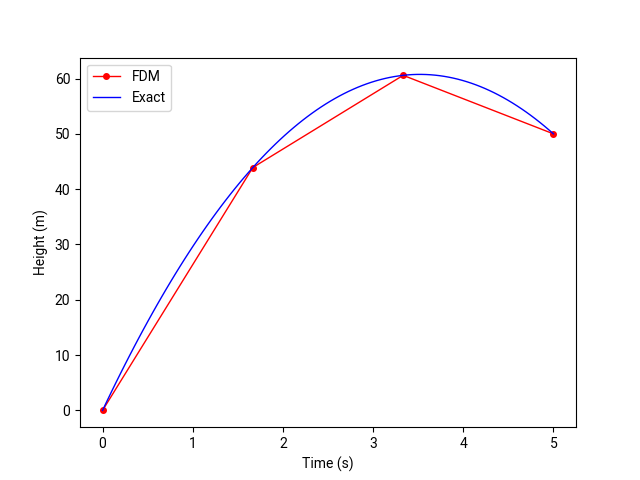

In [78]:

# Matrix Equation Ay = b
# use sparse linalg solver on matrix equation
sol = spsolve(A, b)

# plot results
fig, ax = plt.subplots()
ax.plot(t, sol, '-or', markersize = 4, label = 'FDM')
ax.plot(t_exact, y_exact, '-b', label = 'Exact')
ax.legend()
ax.set_xlabel('Time (s)')
ax.set_ylabel('Height (m)');


### Solving BVPs Using Scipy

- The scipy function `solve_bvp` from `scipy.integrate` can more readily package and solve BVPs.
    - Uses a collocation method (don't worry about it)
    - The output of `solve_bvp` is a lit of piecewise-polynomial interpolations of the solution

#### Example: Steady Heat Conduction with Dirichlet BC's

$$ k \frac{d^2T}{dx^2} = -s$$

$$T(x = a) = T_a   \qquad \qquad T(x=b) = T_b$$

- $k$ is thermal conductivity and $s$ is heat generated per unit volume

- State Equation: let $\frac{dT}{dx} = q$

$$ \begin{gather*}
 S =
  \begin{pmatrix}
   T \\ q
   \end{pmatrix}
\qquad \qquad
 \frac{dS}{dt} =
  \begin{pmatrix}
   \frac{dT}{dx} \\ \frac{dq}{dx}
   \end{pmatrix}
   =
   \begin{pmatrix}
   q \\ -s/k
   \end{pmatrix}  
\end{gather*} $$

In [95]:

from scipy.integrate import solve_bvp

# Define parameters and BCs
k = 1
s = 20 # Heat source divided by k
xa, xb = 0, 2
Ta, Tb = 50, 50


In [96]:

# state function, S = [T, q]. Must output dS/dt = [q, C]
# there are some very specific rules about how to structure the output. Be very careful. 
def fun(t, S):
    T, q = S
    # each of these terms MUST be an array of the same size. Use np.zeros_like or np.ones_like for constants
    dTdx = q
    dqdx = -s*np.ones_like(dTdx)/k
    
    # The matrix solver expects the state derivative function to be vertical. 
    # The easiest way to do this is use np.vstack on the horizontal array
    return np.vstack([dTdx, dqdx])


In [97]:

# Need to define boundary conditions within a function
# Sa and Sb refer to the left and right boundaries, respectively
# The [0] or [1] index refer to T and q, respectively
# Note the sign flip on the BC definitions. This is due to solving for zero in the BC equations.
def bc(Sa, Sb):
    bc1 = Sa[0] - Ta
    bc2 = Sb[0] - Tb
    return np.array([bc1, bc2])

# define a domain to solve over.
x = np.linspace(xa, xb, 50)
S = np.zeros((2, x.size))  # the first arguement is the number of elements in the state variable

# Solve the BVP
sol = solve_bvp(fun, bc, x, S)
x = sol.x
T = sol.y[0]
q = sol.y[1] 


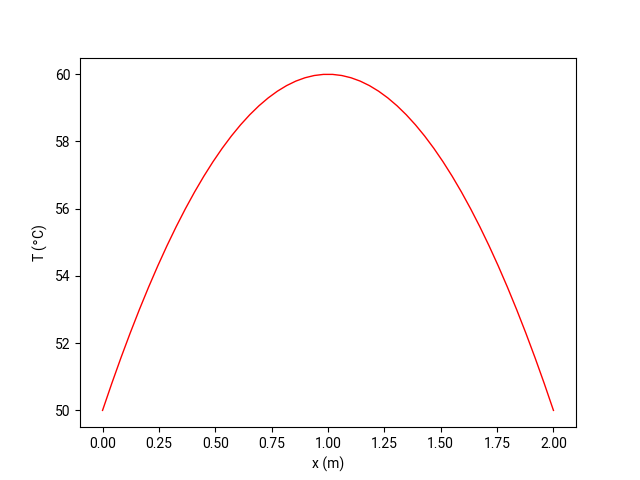

In [98]:
# solve_bvp uses y as the name of the state variable
# T is stored in y[0]. q = dT/dx is stored in y[1]
fig, ax = plt.subplots()
ax.plot(x, T, '-r')
ax.set_xlabel('x (m)')
ax.set_ylabel('T ($\degree$C)');


#### Example: Projectile Motion with mixed BC's

$$ \frac{d^2x}{dt^2} = 0   \qquad \qquad  \frac{d^2y}{dt^2} = -g $$

Define: $\frac{dx}{dt} = \dot{x}$ and $\frac{dy}{dt} = \dot{y}$.
State Equation:

$$
\begin{gather*}
 S =
  \begin{pmatrix}
   x \\ \dot{x} \\ y \\ \dot{y}
   \end{pmatrix}
\qquad \qquad
 \frac{dS}{dt} =
  \begin{pmatrix}
   \dot{x} \\ \ddot{x} \\ \dot{y} \\ \ddot{y}
   \end{pmatrix}
   =
   \begin{pmatrix}
   \dot{x} \\ 0 \\ \dot{y} \\ -g
   \end{pmatrix}  
\end{gather*}
$$


BCs: $$\dot{x}(t=0s) = 10 m/s \qquad y(t=0s) = 0m \qquad x(t=2s) = 5m   \qquad  \dot{y}(t=2s) = -5 m/s$$

In [100]:

# Define parameters and BCs
g = 9.81                 # m/s2
t_start, t_stop = 0, 2   # s
dxdt0 = 10              # m/s
y0 = 0                   # m
x2 = 5                   # m
dydt2 = -5               # m/s


In [101]:

# state function, S = [x, u, y, v]. Must output dS/dt = [u, 0, v, -g]
# there are some very specific rules about how to structure the output. Be very careful. 
def fun(t, S):
    x, dxdt, y, dydt = S
    # each of these terms MUST be an array of the same size. Use np.zeros_like or np.ones_like for constants
    d2xdt2 = np.zeros_like(x)
    d2ydt2 = -g*np.ones_like(x)
    # The matrix solver expects the state derivative function to be vertical. 
    # The easiest way to do this is use np.vstack on the horizontal array
    return np.vstack([dxdt, d2xdt2, dydt, d2ydt2])


In [102]:

# need to define boundary conditions within a function
# Sa and Sb refer to the left and right boundaries, respectively. 
# Use the same indicies as defined by state variable [x, u, y, v]
# Note the sign flip on the BC definitions. This is due to solving for the other side of the BC equation
def bc(Sa, Sb):
    bc1 = Sa[1] - dxdt0
    bc2 = Sb[0] - x2
    bc3 = Sa[2] - y0
    bc4 = Sb[3] - dydt2
    return np.array([bc1, bc2, bc3, bc4])


In [103]:

# define a domain to solve over.
t = np.linspace(t_start, t_stop, 20)
S = np.zeros((4, t.size))   # the first arguement is the number of elements in the state variable

sol = solve_bvp(fun, bc, t, S)


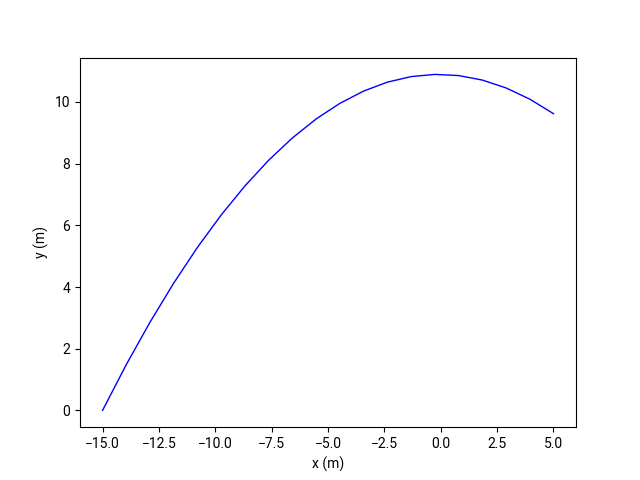

In [106]:

# create plots
fig, ax = plt.subplots()
ax.plot(sol.y[0], sol.y[2], '-b')
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)');


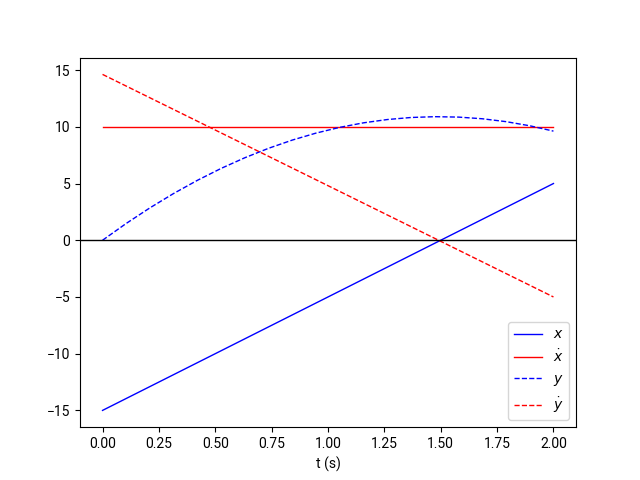

In [116]:

fig, ax = plt.subplots()
ax.plot(t, sol.y[0], '-b', label = '$x$')
ax.plot(t, sol.y[1], '-r', label = '$\dot{x}$')
ax.plot(t, sol.y[2], '--b', label = '$y$')
ax.plot(t, sol.y[3], '--r', label = '$\dot{y}$')
ax.axhline(0, ls='-', color='k', lw=1)
ax.legend()
ax.set_xlabel('t (s)');


## Partial Differential Equations

- PDEs involve partial derivatives

- Any problem in which parameters can vary in more than one of time or the three spatial dimensions must be modeled as a PDE
    - Many real-world problems are best modeled with PDEs
    - ODEs are still useful in modeling specialized or simplified problems

- While the finite difference method can be used to solve PDEs with simple domains, finite element or finite volume methods are more popular
    - In ME 313 - Engineering Analaysis, you will learn finite element method to solve structural engineering problems

- If you need to solve a PDE in the future, search for algorithms or modules for the specific type of problem you are solving
    - 2D transient heat diffusion
    - Viscous, unsteady pipe flow

- Many common types of physics have specialized software packages
    - Structural mechanics in Solidworks (rudimentary), Ansys, Abaqus, Comsol, etc.
        - Use the finite element method
    - Fluid or thermofluid problems in Ansys Fluent, Star-CCM+, OpenFoam, etc.
        - Known as computational fluid dynamics (CFD) packages and predominantly use the finite volume method

## Further Reading

- Initial and boundary value problems
    - https://pythonnumericalmethods.berkeley.edu/notebooks/chapter22.00-ODE-Initial-Value-Problems.html 
    - https://pythonnumericalmethods.berkeley.edu/notebooks/chapter23.00-ODE-Boundary-Value-Problems.html 
- Programming for Computations
    - https://hplgit.github.io/prog4comp/doc/pub/p4c-sphinx-Python/ 
- Finite Difference Computing with Exponential Decay Models
    - https://hplgit.github.io/decay-book/doc/web/index.html  
- Finite Difference Computing with PDEs
    - https://hplgit.github.io/fdm-book/doc/web/index.html 